In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the CSV with the lithology data into a DataFrame

In [2]:
df_lithology = pd.read_csv("lithology_3_BRSA_778_SE.csv")

### Checking the count of each lithology before preprocessing

In [23]:
lithology_count_before = df_lithology['LITOLOGIA'].value_counts()
lithology_count_before

LITOLOGIA
CALCARENITO    1792
ARENITO        1777
FOLHELHO       1480
CALCILUTITO    1027
FILITO          794
DOLOMITA         69
ARGILITO         50
MARGA            35
SILTITO          12
Name: count, dtype: int64

### Checking the % of lithology before preprocessing

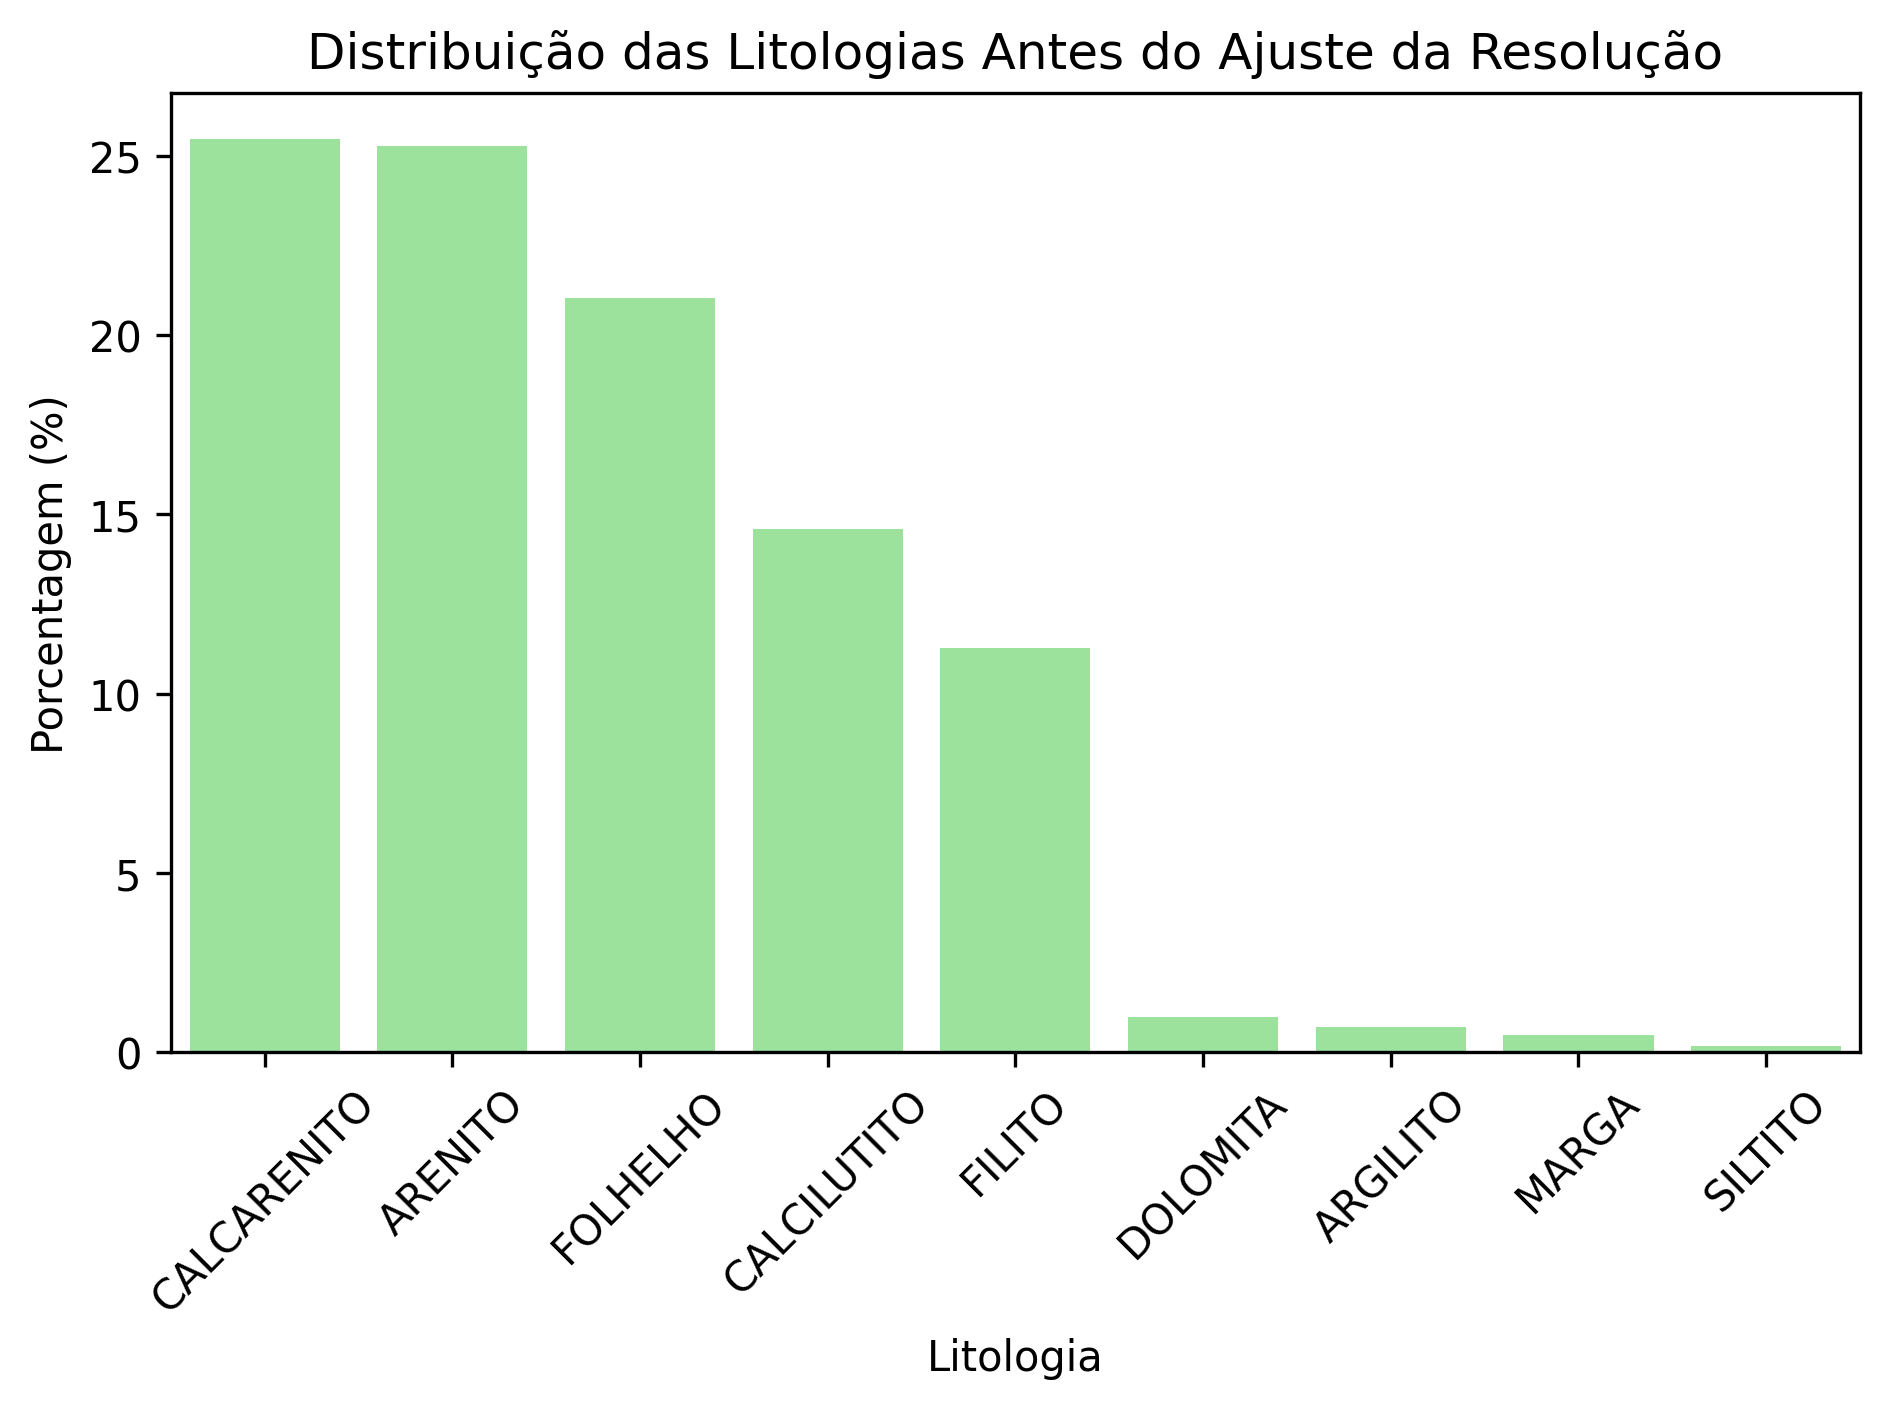

In [ ]:
# Obtendo as porcentagens de cada litologia
lithology_before = df_lithology['LITOLOGIA'].value_counts(normalize=True) * 100

# Garantir que o índice seja uma coluna (necessário para barplot)
lithology_before_df = lithology_before.reset_index()
lithology_before_df.columns = ['Litologia', 'Porcentagem']

# Plotando
plt.figure(dpi=300)
sns.barplot(data=lithology_before_df, x='Litologia', y='Porcentagem', color='lightgreen')

plt.title("Distribuição das Litologias Antes do Ajuste da Resolução")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Litologia")
plt.xticks(rotation=45) 
plt.tight_layout()

plt.savefig("Distribuicao-Litologias-Antes.png", dpi=300)

plt.show()

### Generate 1cm interval

In [14]:
min_depth = df_lithology['TDEP'].min()
max_depth = df_lithology['TDEP'].max()

new_tdep = np.round(np.arange(min_depth, max_depth + 0.001, 0.01), 2)

In [16]:
results = []

for depth in new_tdep:
    if depth in df_lithology['TDEP'].values:
        lithology = df_lithology[df_lithology['TDEP'] == depth]['LITOLOGIA'].values[0]
    else:
        below = df_lithology[df_lithology['TDEP'] < depth].tail(1)
        above = df_lithology[df_lithology['TDEP'] > depth].head(1)

        if below.empty or above.empty:
            lithology = np.nan
        else:
            mid = round((below['TDEP'].values[0] + above['TDEP'].values[0]) / 2, 2)

            if depth < mid:
                lithology = below['LITOLOGIA'].values[0]
            else:
                lithology = above['LITOLOGIA'].values[0]
    
    results.append([depth, lithology])

In [17]:
df_results = pd.DataFrame(results, columns=['TDEP', 'Lithology'])

### Checking the count of each lithology after the preprocessing

In [24]:
lithology_count_after = df_results['Lithology'].value_counts()
lithology_count_after

Lithology
CALCARENITO    17920
ARENITO        17770
FOLHELHO       14800
CALCILUTITO    10270
FILITO          7936
DOLOMITA         690
ARGILITO         500
MARGA            350
SILTITO          120
Name: count, dtype: int64

### Checking the % of lithology after the preprocessing

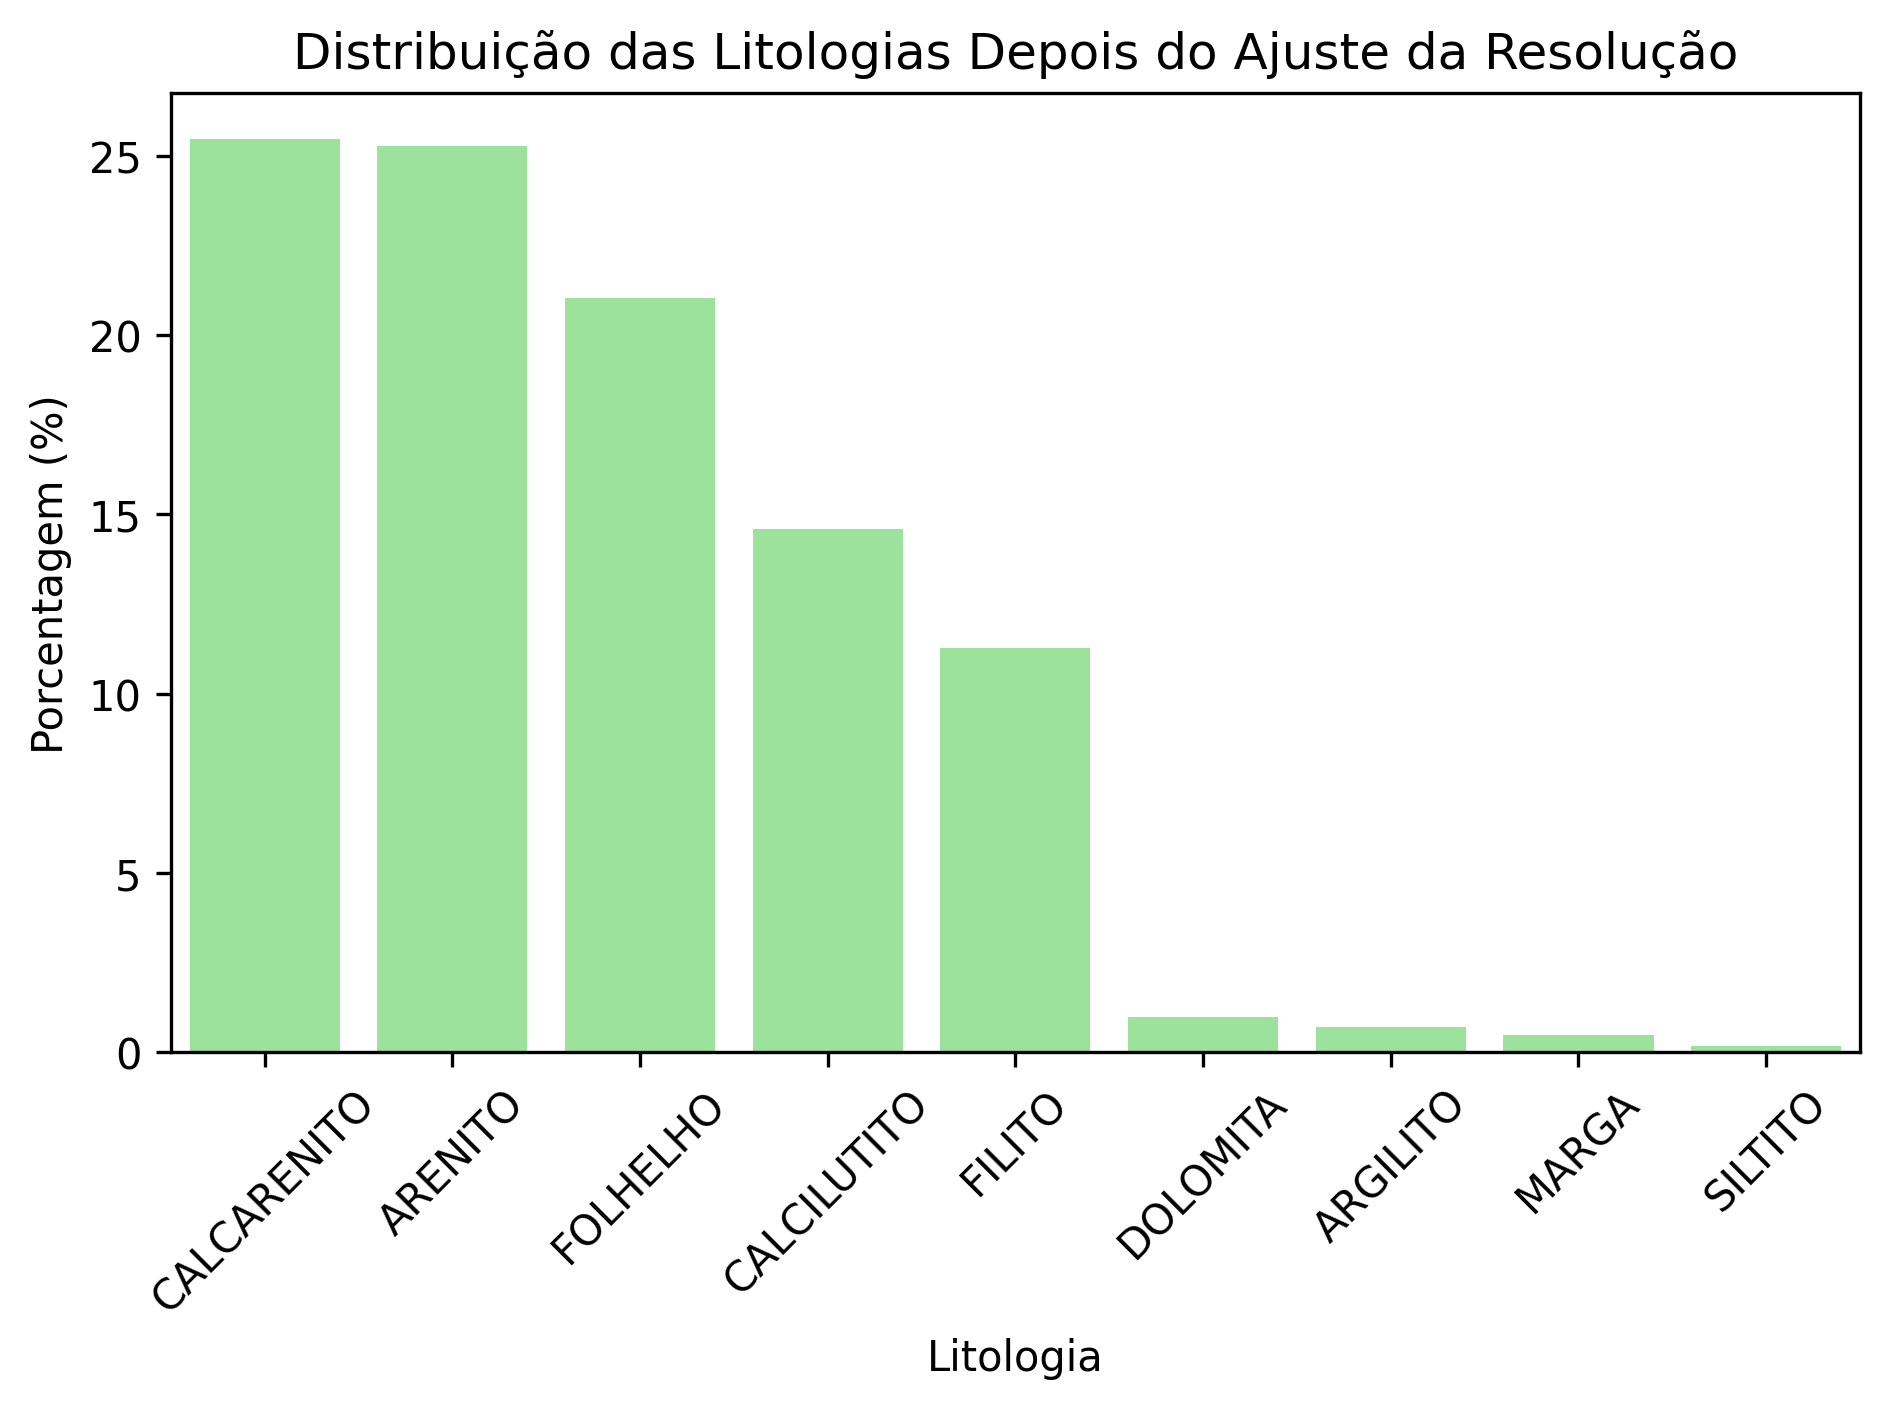

In [20]:
lithology_after = df_results['Lithology'].value_counts(normalize=True) * 100

# Preparing the df
lithology_after_df = lithology_after.reset_index()
lithology_after_df.columns = ['Litologia', 'Porcentagem']

plt.figure(dpi=300)
sns.barplot(data=lithology_after_df, x='Litologia', y='Porcentagem', color='lightgreen')

plt.title("Distribuição das Litologias Depois do Ajuste da Resolução")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Litologia")
plt.xticks(rotation=45) 
plt.tight_layout()

plt.savefig("Distribuicao-Litologias-Depois.png", dpi=300)

plt.show()

In [26]:
df_results.to_csv("lithology_res_preprocess.csv", index=False)